### ***Imports and Data Loading***

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('always')
warnings.filterwarnings('ignore')


from sklearn.decomposition import FastICA

from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [2]:
data = pd.read_excel('labelled_data.xlsx')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107853 entries, 0 to 107852
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   timestamp  107853 non-null  object 
 1   state      107853 non-null  int64  
 2   Ax         107853 non-null  float64
 3   Ay         107853 non-null  float64
 4   Az         107853 non-null  float64
 5   Gx         107853 non-null  float64
 6   Gy         107853 non-null  float64
 7   Gz         107853 non-null  float64
 8   Class      107853 non-null  object 
dtypes: float64(6), int64(1), object(2)
memory usage: 7.4+ MB


In [3]:
data = data.drop(['timestamp', 'state'], axis=1)

data_y = data['Class']
data_x = data.drop(['Class'], axis=1)

In [4]:
data['Class'].value_counts()/len(data)*100

happy    81.268022
none     11.930127
frown     6.801851
Name: Class, dtype: float64

In [5]:
features = ['Ax', 'Ay', 'Az', 'Gx', 'Gy', 'Gz']
labels = ['none', 'happy', 'frown']

### ***Helper Functions***

##### *Distribution Plots Helper*

In [6]:
def distribution_plotter(features, data_x, data_y, mean, std):
    plt.figure(figsize=(30,3*6))

    count = 1

    for i in features:
        ax = plt.subplot(3, 2, count)

        sns.distplot(data_x[i][data_y == 'none'], bins=50)
        sns.distplot(data_x[i][data_y == 'happy'], bins=50)
        sns.distplot(data_x[i][data_y == 'frown'], bins=50)
        
        plt.axvline(x=mean[i]+2*std[i], color='black')
        plt.axvline(x=mean[i]+std[i], color='red')
        plt.axvline(x=mean[i], linestyle='--')
        plt.axvline(x=mean[i]-std[i], color='red') 
        plt.axvline(x=mean[i]-2*std[i], color='black')
        
        ax.set_title('Histogram and distribution of feature ' + i)
        
        plt.legend(title='State', loc='upper left', labels=['None', 'Happy', 'Frown'])
        
        count += 1

##### *Whisker-Box Plots Helper*

In [7]:
def whisker_box_plotter(features, data, mean, std):
    plt.figure(figsize=(24,4*6))

    count = 1

    for i in features:
        ax = plt.subplot(3, 2, count)

        sns.boxplot(data, y=i, x='Class', hue='Class')
        plt.axhline(y=mean[i]+2*std[i], color='black')
        plt.axhline(y=mean[i]+std[i], color='red')
        plt.axhline(y=mean[i], linestyle='--')
        plt.axhline(y=mean[i]-std[i], color='red') 
        plt.axhline(y=mean[i]-2*std[i], color='black')

        ax.set_title(f'Whisker-Box plot of feature {i}')
        
        # plt.legend(title='State', loc='upper left', labels=['None', 'Happy', 'Frown'])
        
        count += 1


##### *ICA Helper*

In [8]:
def ica_plots(data_x):

    transformer = FastICA(n_components=None,
        random_state=0,
        whiten='arbitrary-variance')
    X_transformed = transformer.fit_transform(data_x)
    # X_transformed.shape
    
    transformed_df = pd.DataFrame(X_transformed)
    # print(transformed_df)
    
    plt.figure(figsize=(12, 15))
    for i in range(6):
        plt.subplot(5, 2, i+1)
        plt.plot(transformed_df[i])
    plt.show()
    
    return transformed_df

##### *Single Feature Scatter Plots Helper*

In [9]:
def scatter_plotter(features, data_x, data_y, mean, std):
    data_none = data_x.loc[data_y == 'none']
    data_happy = data_x.loc[data_y == 'happy']
    data_frown = data_x.loc[data_y == 'frown']
    
    plt.figure(figsize=(40,16*6))

    count = 1

    for i in features:
        ax = plt.subplot(6, 1, count)

        plt.scatter(x=[i for i in range (1, len(data_none)+1)], y=data_none[i])
        plt.scatter(x=[i for i in range (1, len(data_happy)+1)], y=data_happy[i])
        plt.scatter(x=[i for i in range (1, len(data_frown)+1)], y=data_frown[i])
        
        plt.axhline(y=mean[i]+2*std[i], color='black')
        plt.axhline(y=mean[i]+std[i], color='red')
        plt.axhline(y=mean[i], linestyle='--')
        plt.axhline(y=mean[i]-std[i], color='red') 
        plt.axhline(y=mean[i]-2*std[i], color='black')

        ax.set_title(f'Scatter plot of feature {i}')
        
        count += 1
    
    

### ***Visualization (Raw Data)***

##### *General Info (Mean, Standard Deviation, Maximum and Minimum)*

In [10]:
data_mean = data_x.mean()
data_std = data_x.std()
data_max = data_x.max()
data_min = data_x.min()

In [11]:
for i in features:
    print(f'{i}... Mean: {data_mean[i]}, Standard Deviation: {data_std[i]}, Max: {data_max[i]}, Min: {data_min[i]}')

Ax... Mean: -0.37760281753578945, Standard Deviation: 0.7867125137488178, Max: 1.0445556640625, Min: -1.2369384765625
Ay... Mean: 0.07794181926513982, Standard Deviation: 0.418841605553889, Max: 1.1610107421875, Min: -1.284912109375
Az... Mean: -0.07406570966384801, Standard Deviation: 0.23582205814880774, Max: 0.603515625, Min: -1.5550537109375
Gx... Mean: -1.7097580084726884, Standard Deviation: 17.274694937580033, Max: 991.189024390244, Min: -999.0243902439025
Gy... Mean: 1.4556214499726707, Standard Deviation: 16.99145674141574, Max: 991.189024390244, Min: -999.0243902439025
Gz... Mean: -5.711352715179402, Standard Deviation: 16.479493136037778, Max: 991.189024390244, Min: -999.0243902439025


##### *Plots*

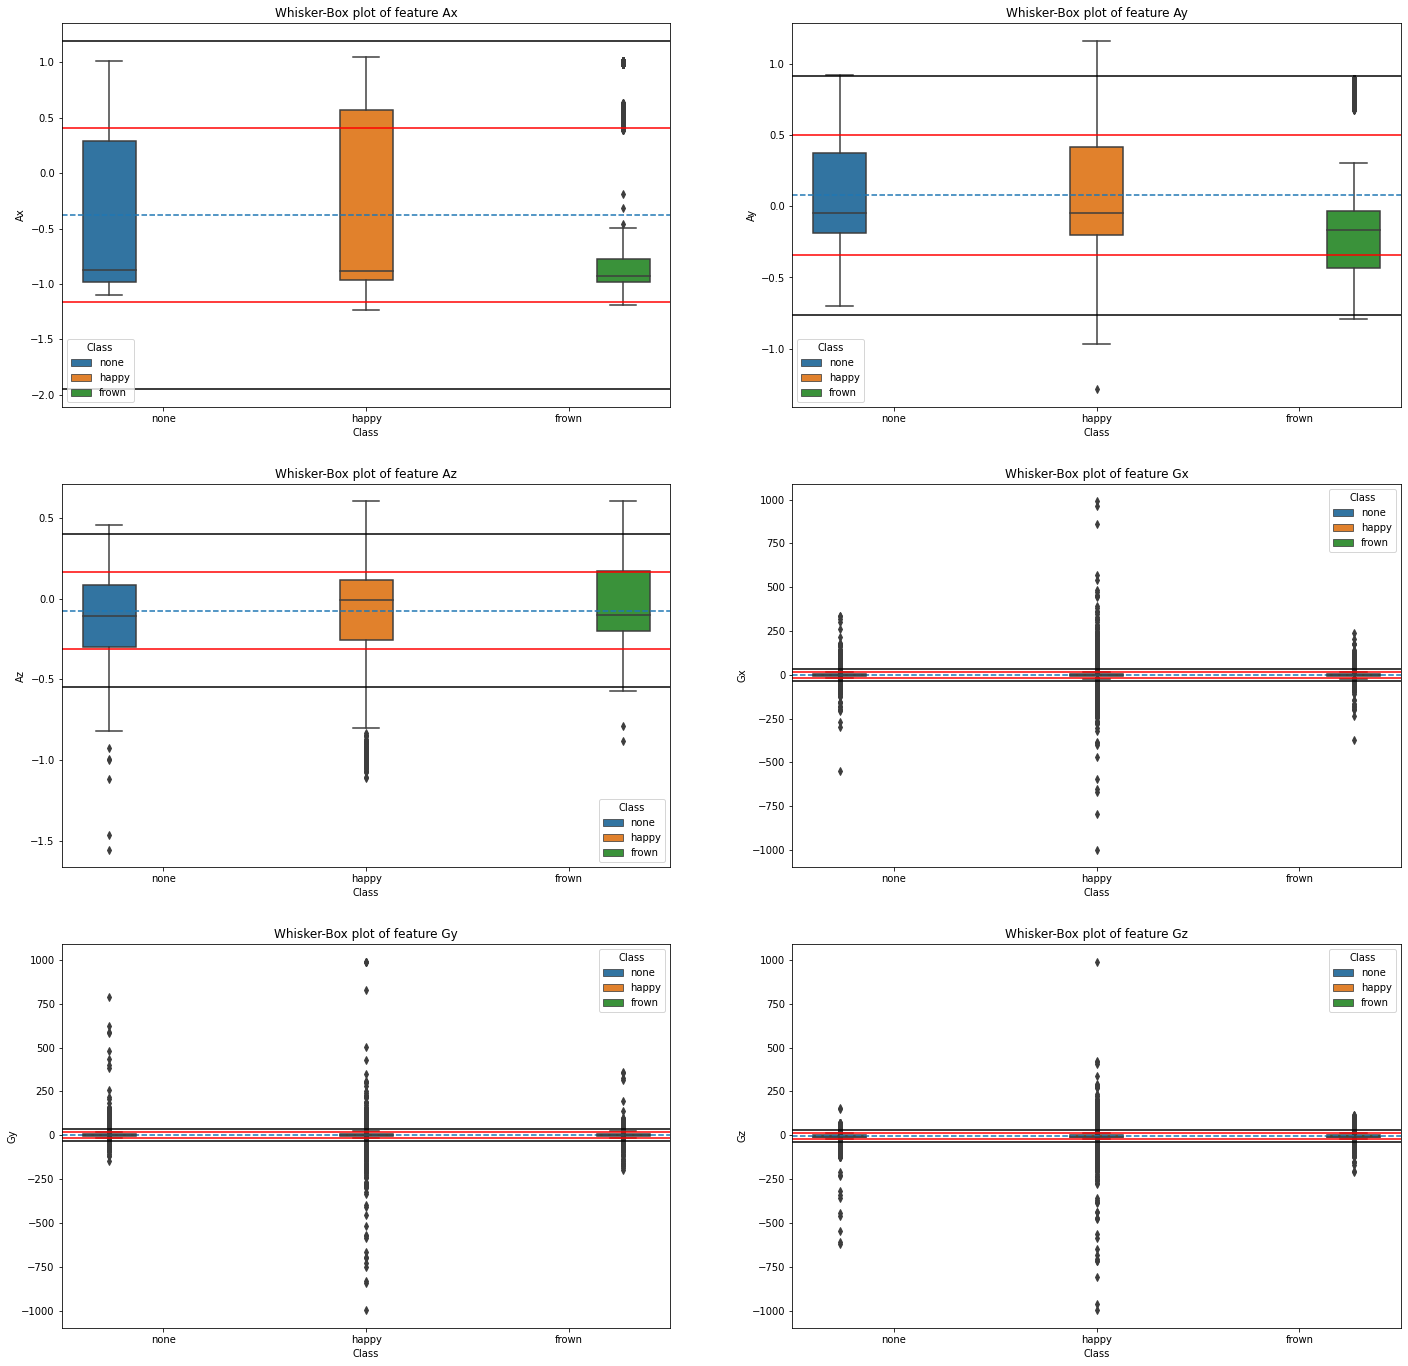

In [12]:
whisker_box_plotter(features, data, data_mean, data_std)

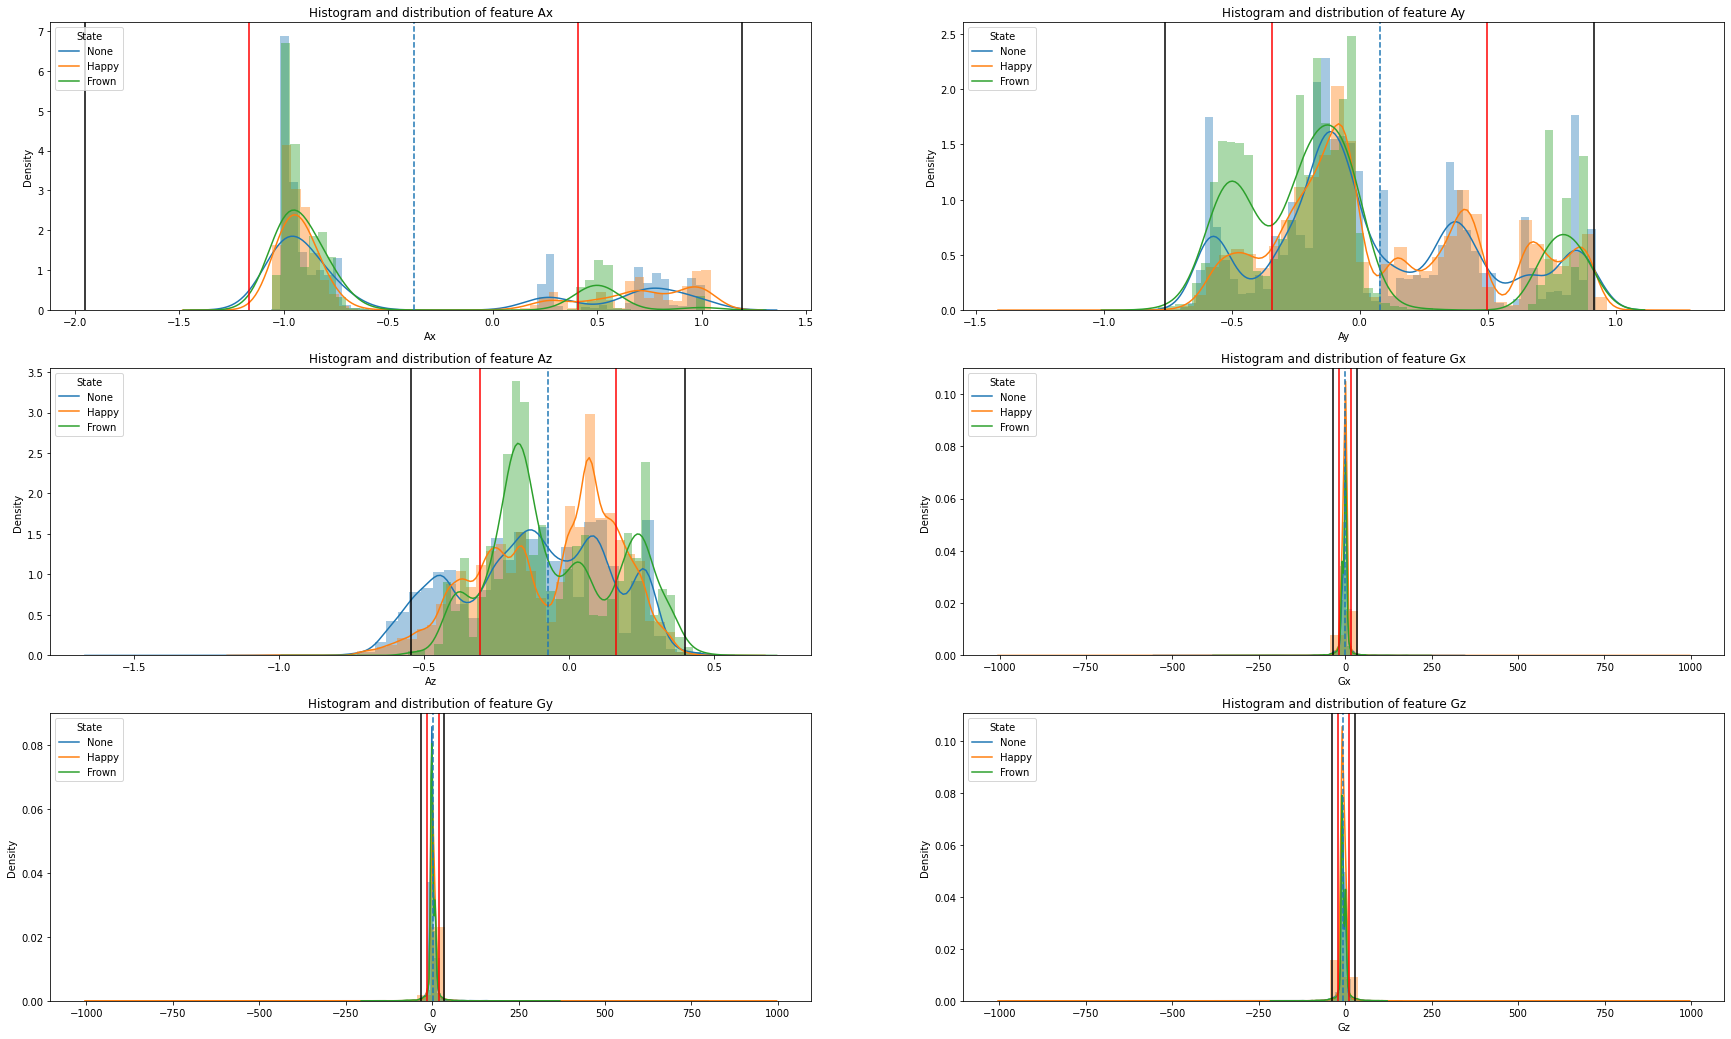

In [13]:
distribution_plotter(features, data_x, data_y, data_mean, data_std)

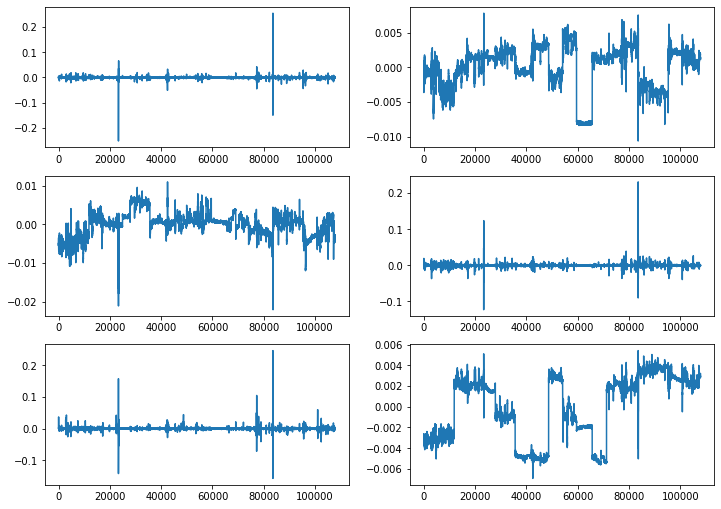

In [14]:
ica_data_x = ica_plots(data_x)
ica_raw = ica_data_x.assign(Class=data_y)
ica_raw.to_excel('original_ica.xlsx')

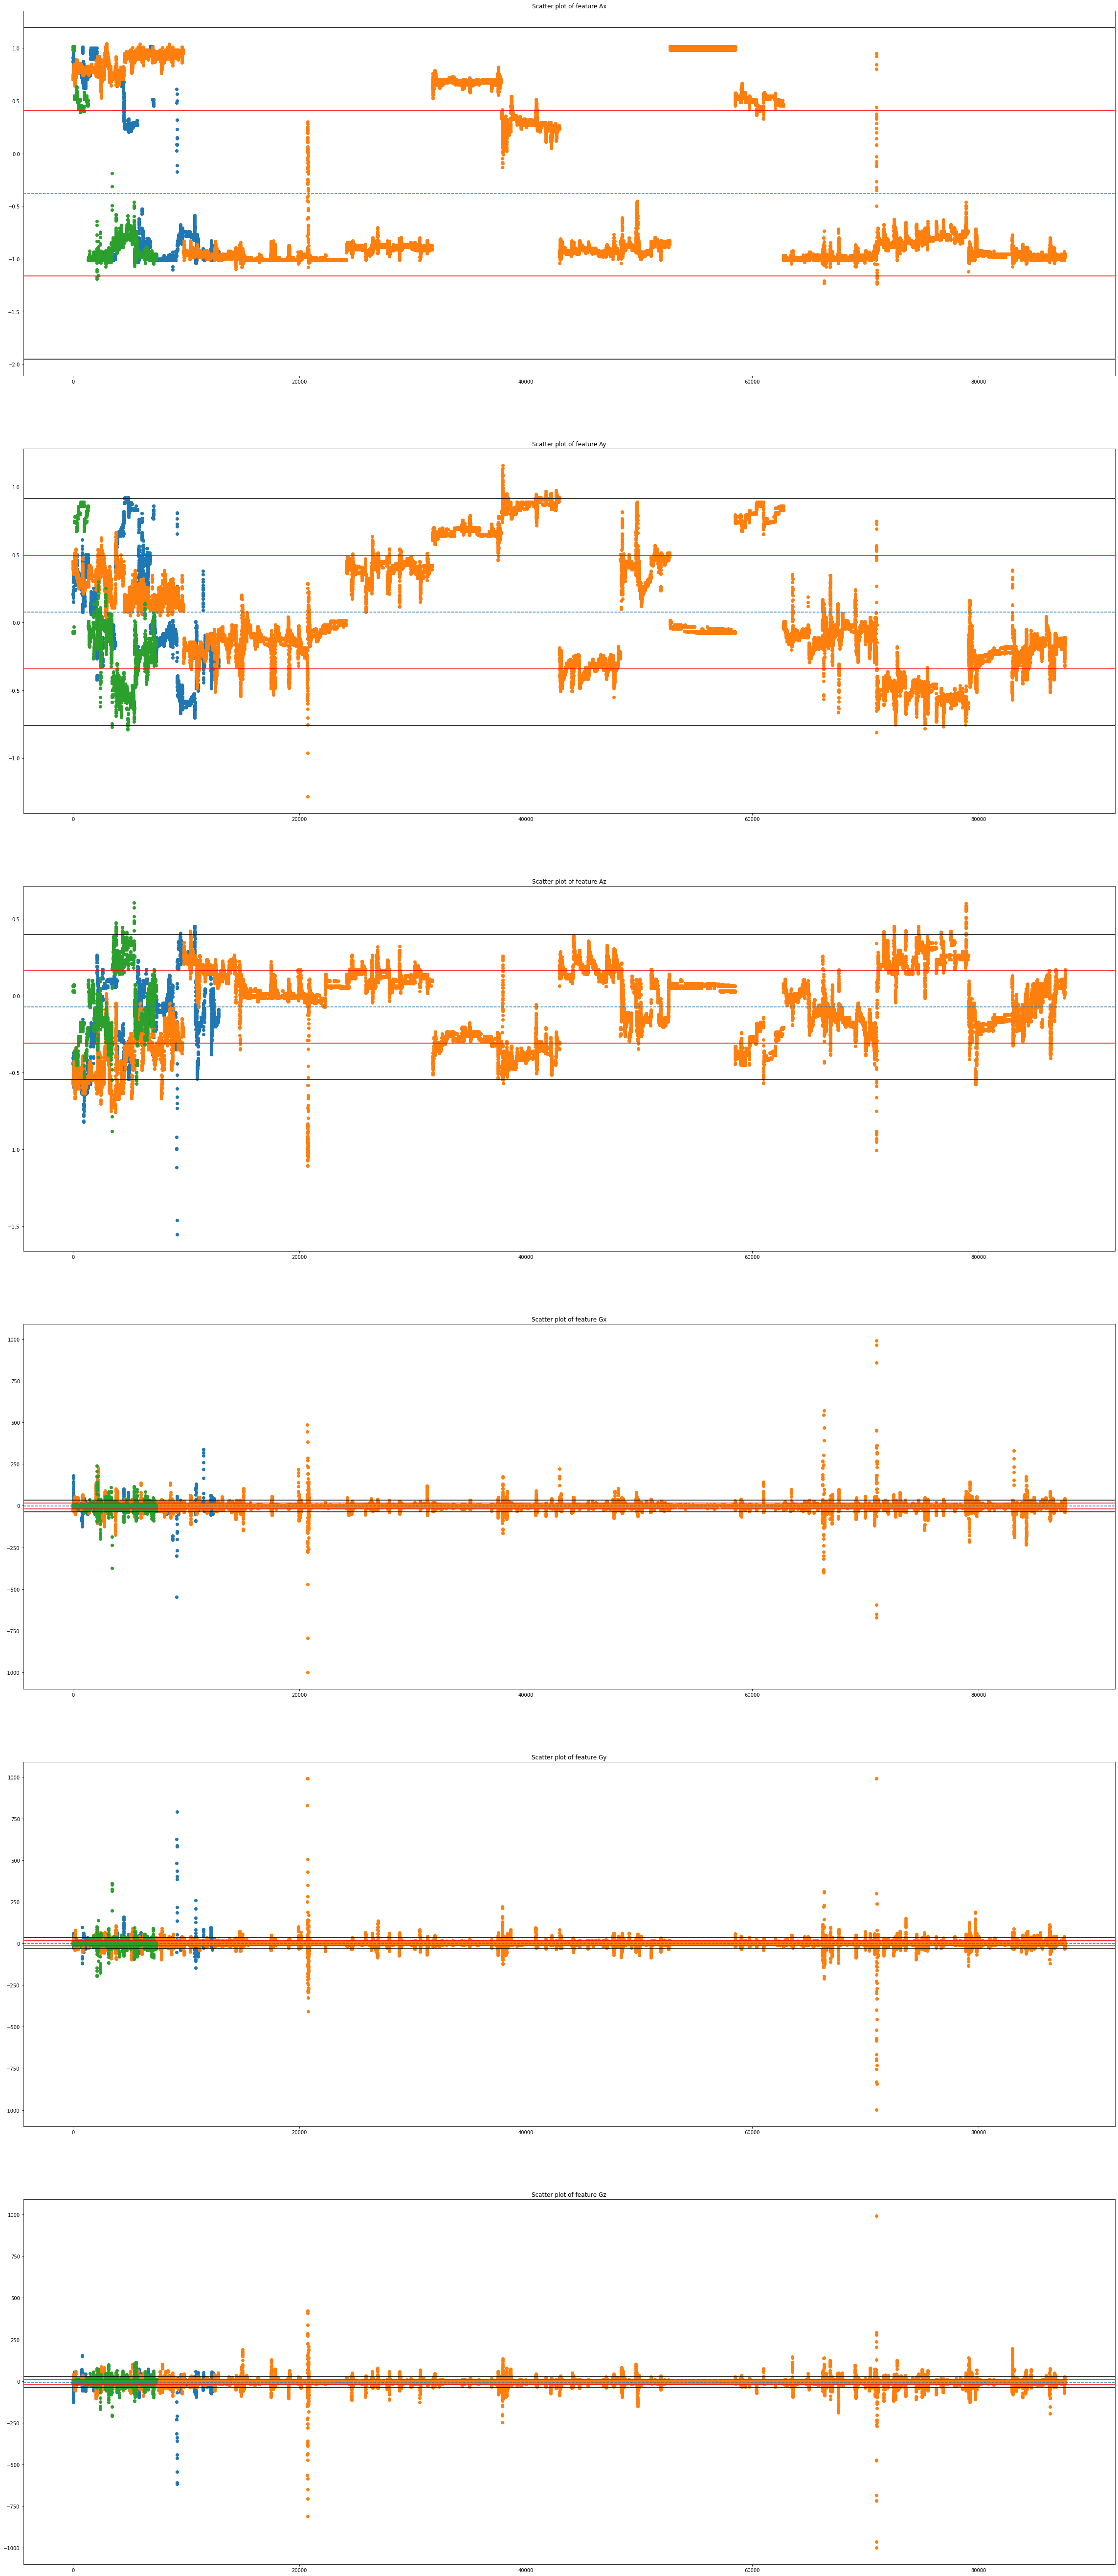

In [15]:
scatter_plotter(features, data_x, data_y, data_mean, data_std)

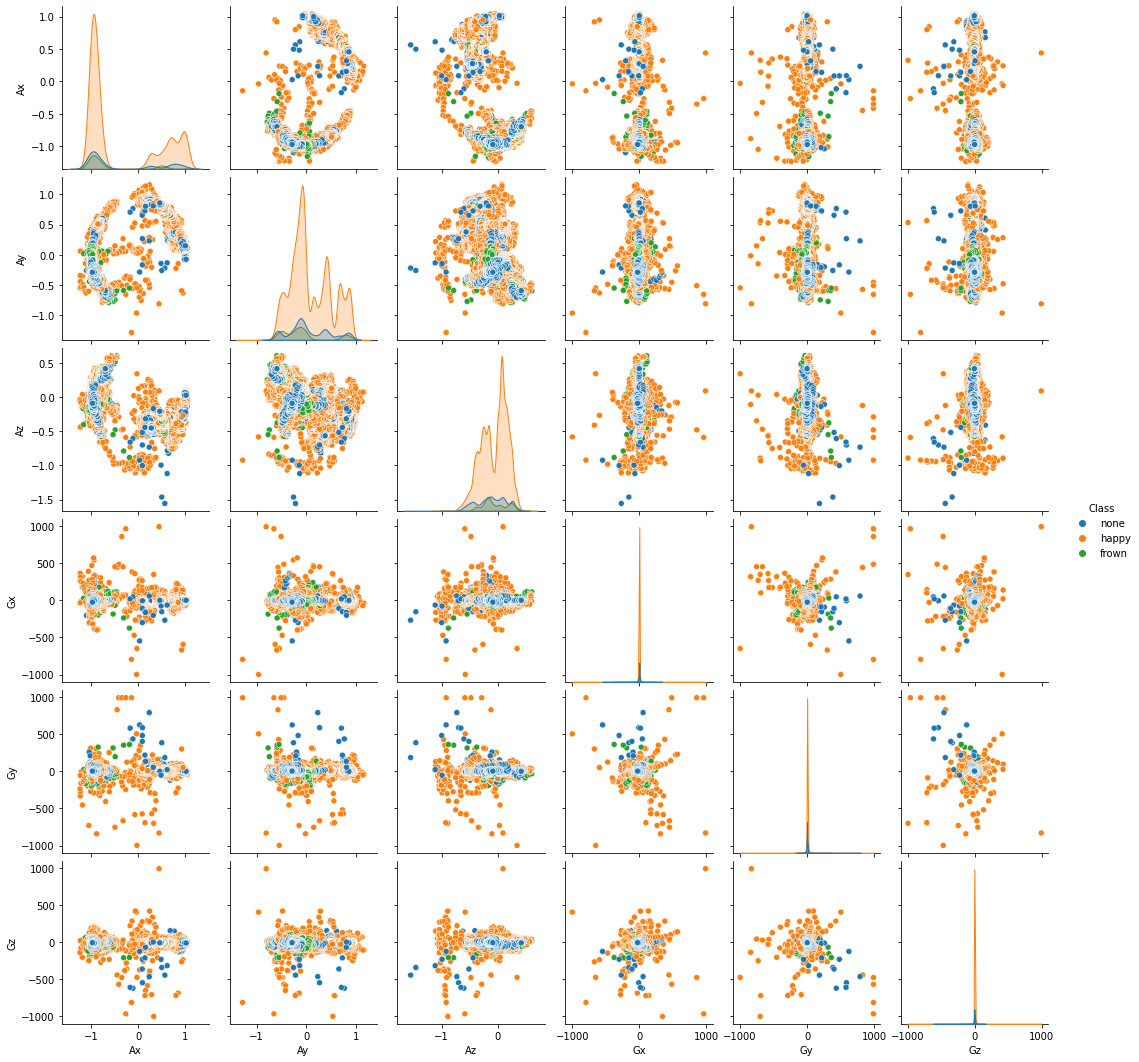

In [16]:
sns.pairplot(data, hue='Class')

<AxesSubplot:>

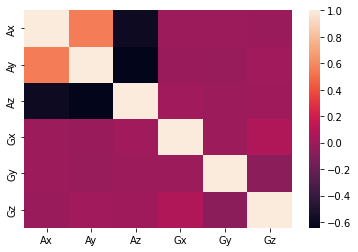

In [45]:
sns.heatmap(data_x.corr())

### ***Pre-Processing***

##### *Removing Outliers*

In [17]:
data_copy = data.copy()

data_copy = data_copy.drop(data_copy[abs(data_copy['Gx']-data_mean['Gx'])>data_std['Gx']].index)
print(f'Data points left: {len(data_copy)}')
data_copy = data_copy.drop(data_copy[abs(data_copy['Gy']-data_mean['Gy'])>data_std['Gy']].index)
print(f'Data points left: {len(data_copy)}')
data_copy = data_copy.drop(data_copy[abs(data_copy['Gz']-data_mean['Gz'])>data_std['Gz']].index)
print(f'Data points left: {len(data_copy)}')


Data points left: 100196
Data points left: 97087
Data points left: 94163


In [18]:
data_new_y = data_copy['Class']
data_new_x = data_copy.drop(columns=['Class'])
data_new_x = data_new_x.apply(lambda iterator: (iterator - iterator.mean())/iterator.std())
data_new = data_new_x.assign(Class=data_new_y)

data_new.to_excel('data_new.xlsx')

In [19]:
data_new_mean = data_new_x.mean()
data_new_std = data_new_x.std()
data_new_max = data_new_x.max()
data_new_min = data_new_x.min()

In [20]:
for i in features:
    print(f'{i}... Mean: {data_new_mean[i]}, Standard Deviation: {data_new_std[i]}, Max: {data_new_max[i]}, Min: {data_new_min[i]}')

Ax... Mean: 9.658726907308904e-18, Standard Deviation: 0.9999999999999999, Max: 1.7884870031054998, Min: -1.0585767827773525
Ay... Mean: 0.0, Standard Deviation: 0.9999999999999998, Max: 2.107293043347653, Min: -2.057245241367199
Az... Mean: 3.622022590240839e-17, Standard Deviation: 1.0, Max: 2.252102721997093, Min: -3.0934945583647937
Gx... Mean: 3.380554417558116e-17, Standard Deviation: 0.9999999999999998, Max: 3.13624004820164, Min: -3.19628347758401
Gy... Mean: -2.414681726827226e-17, Standard Deviation: 1.0, Max: 3.424681134518135, Min: -3.3524371968000115
Gz... Mean: -1.1831940461453407e-16, Standard Deviation: 1.0, Max: 3.02216208913086, Min: -3.078755855736424


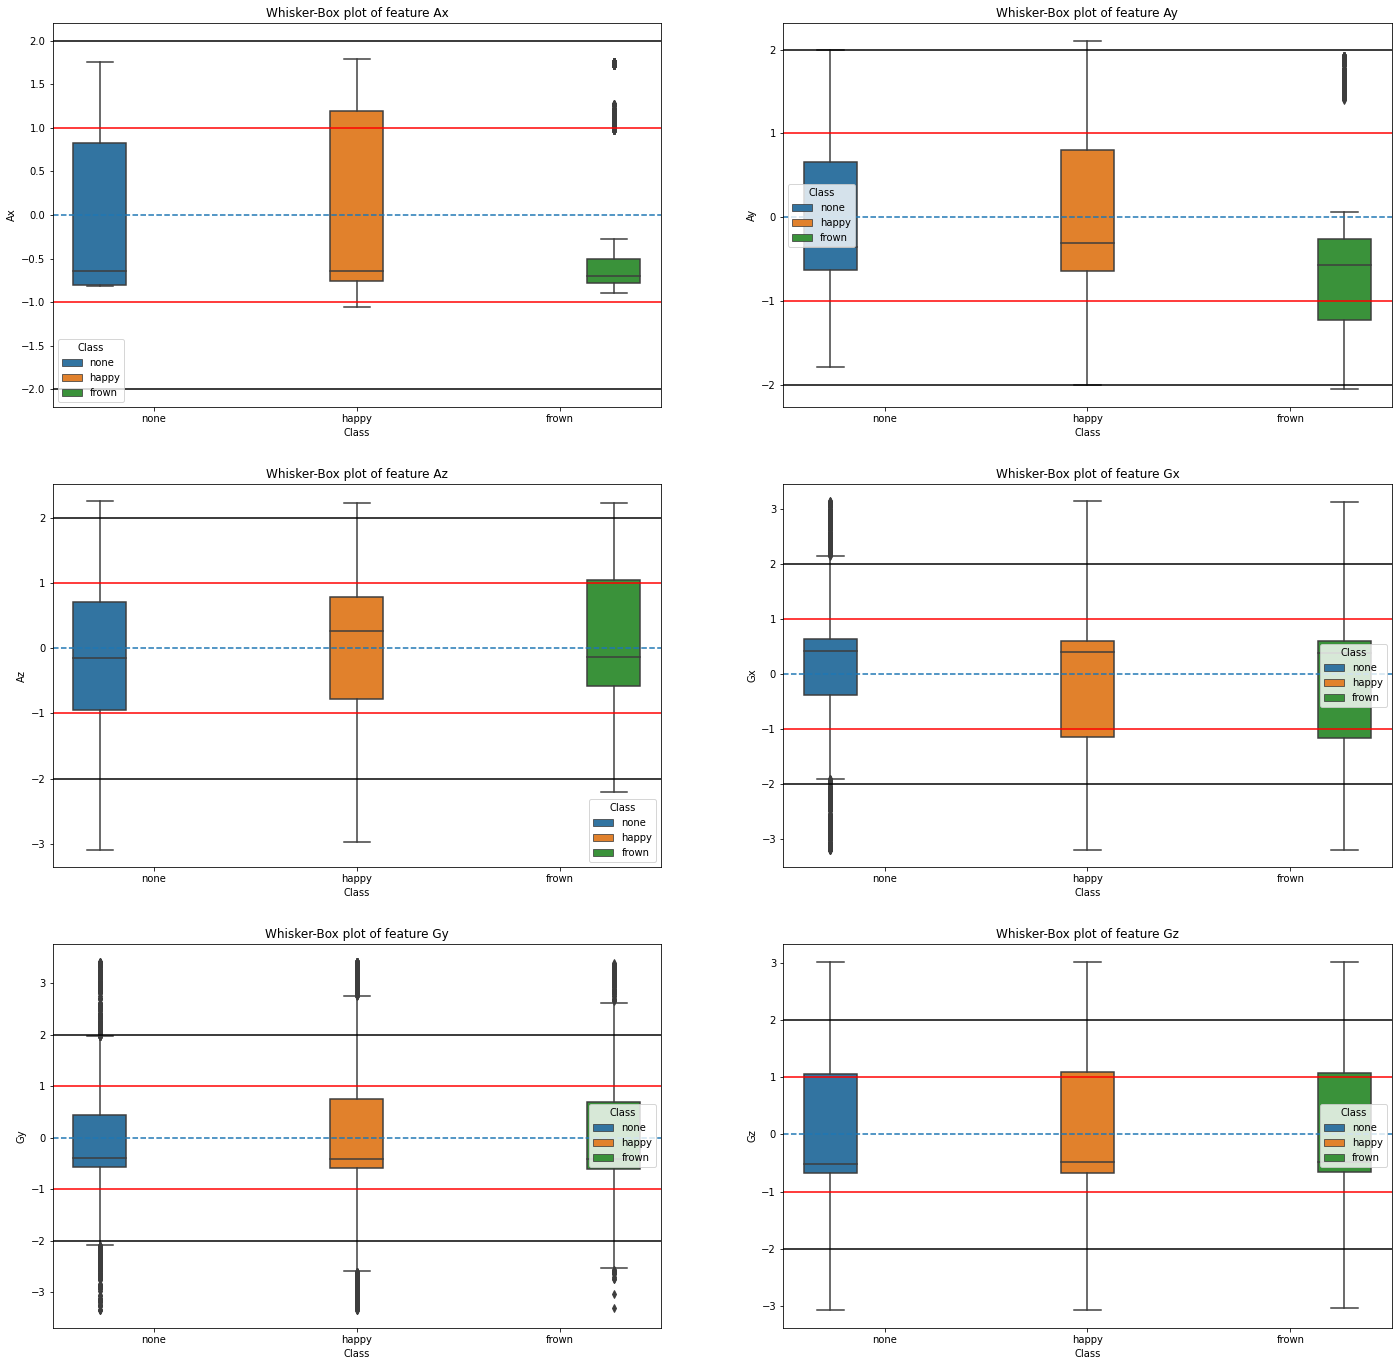

In [21]:
whisker_box_plotter(features, data_new, data_new_mean, data_new_std)

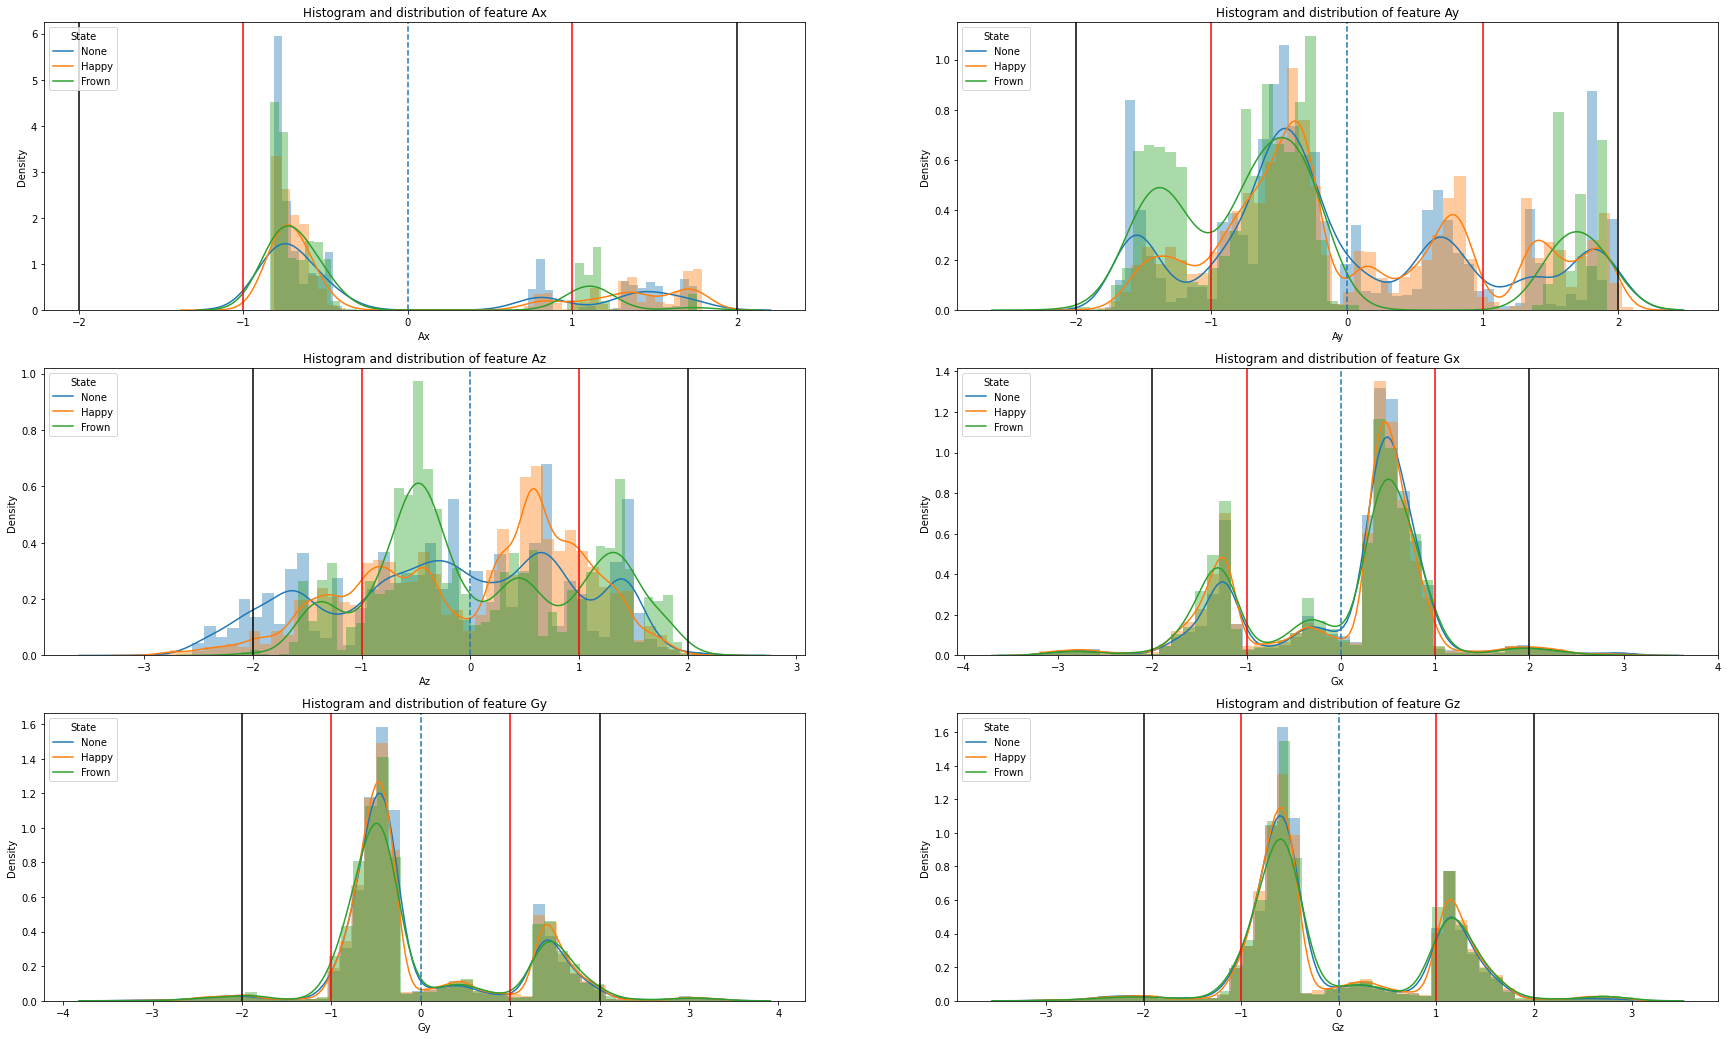

In [22]:
distribution_plotter(features, data_new_x, data_new_y, data_new_mean, data_new_std)

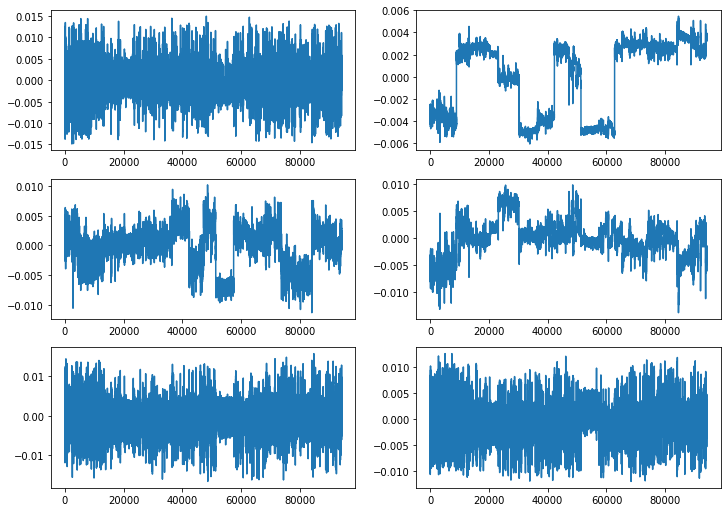

In [23]:
ica_datanew_x = ica_plots(data_new_x)
ica_new = ica_datanew_x.assign(Class=data_new_y)
ica_new.to_excel('newdata_ica.xlsx')

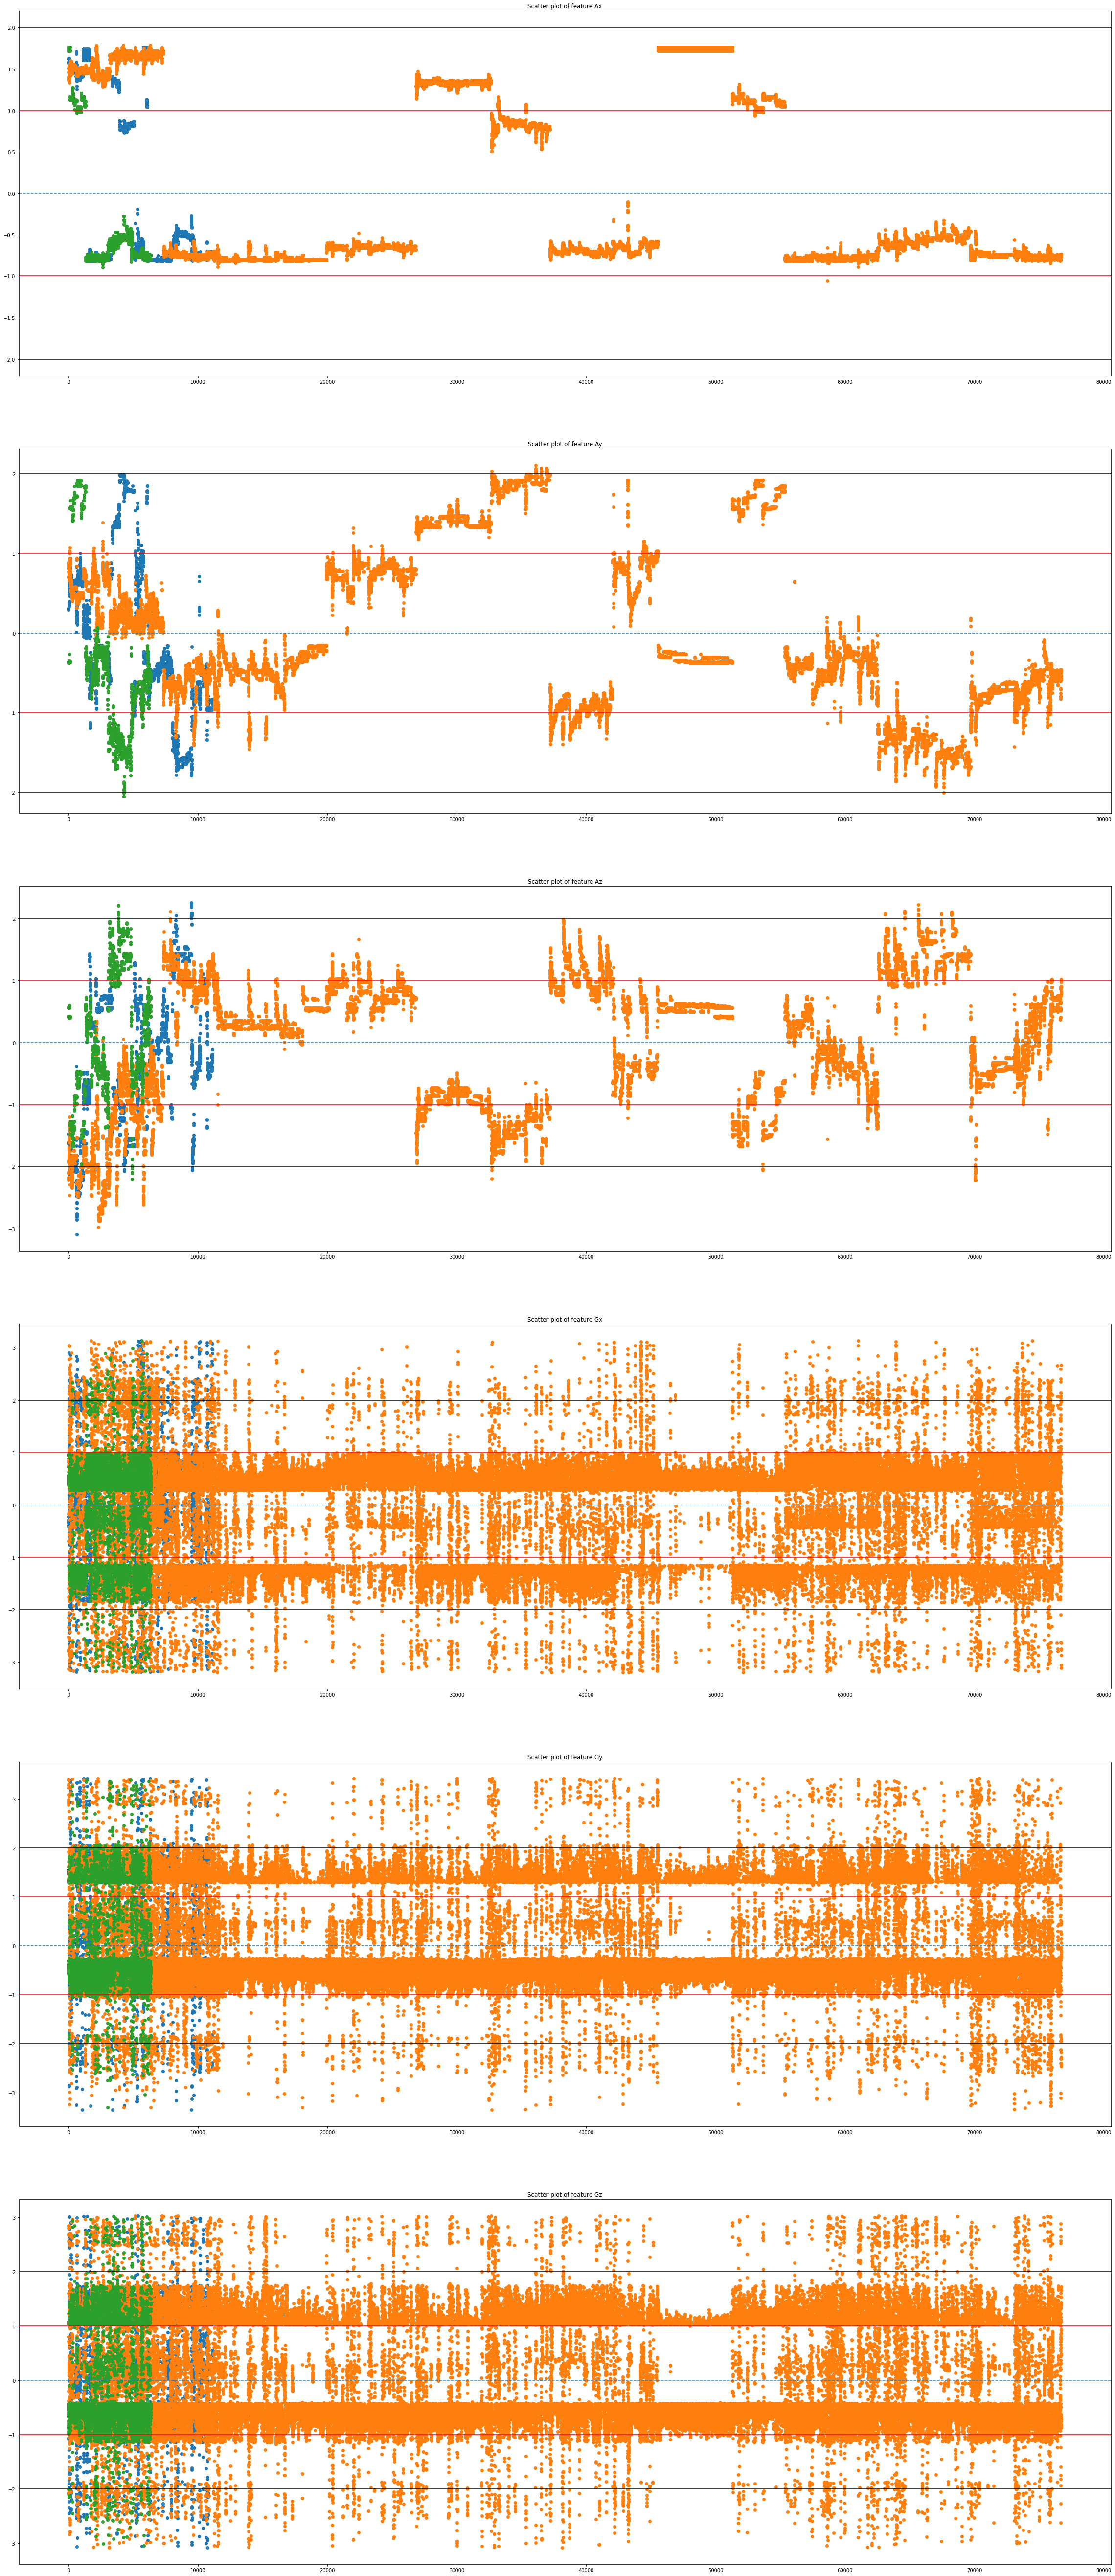

In [24]:
scatter_plotter(features, data_new_x, data_new_y, data_new_mean, data_new_std)

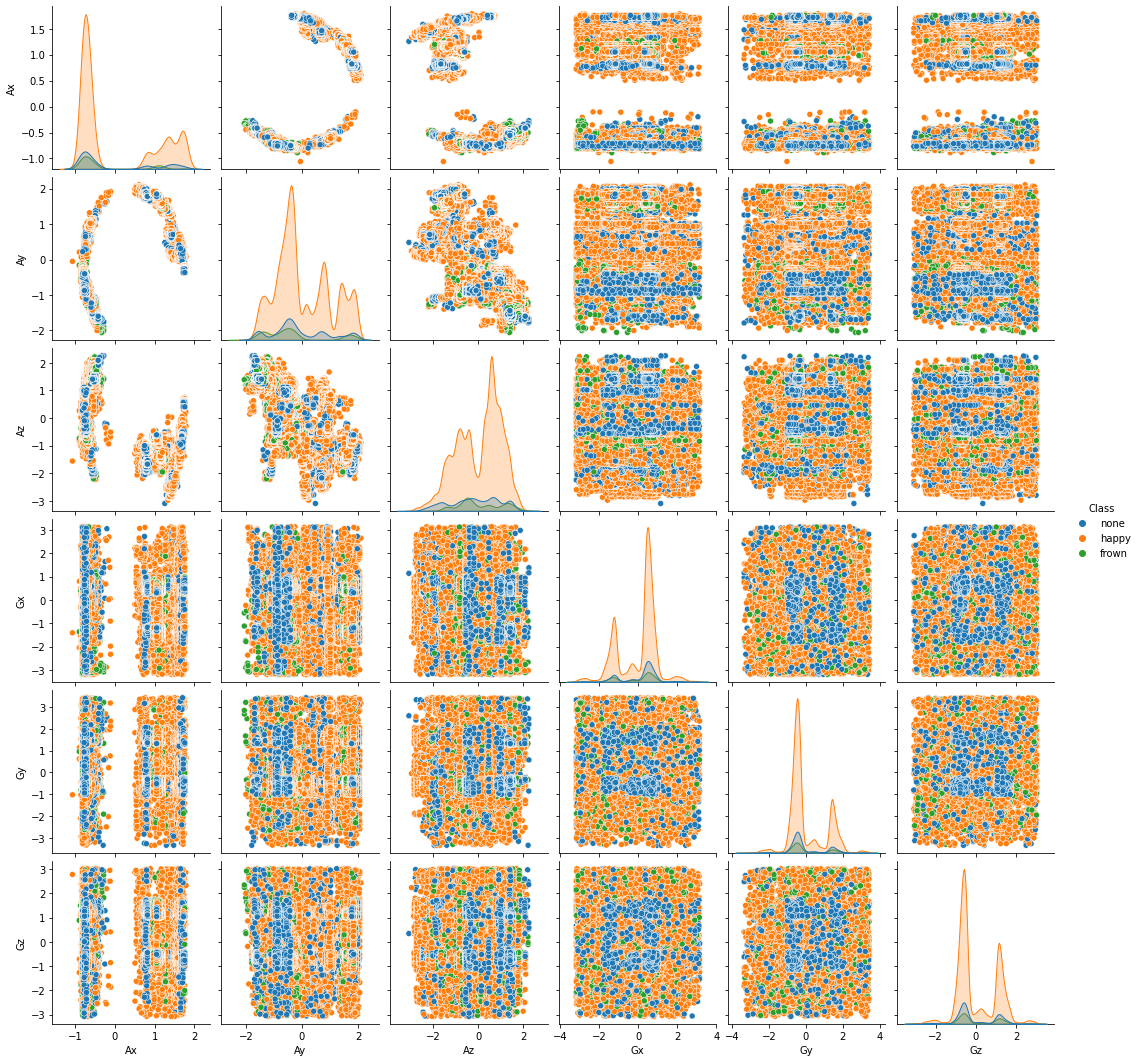

In [25]:
sns.pairplot(data_new, hue='Class')

<AxesSubplot:>

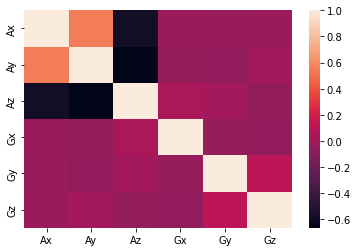

In [26]:
sns.heatmap(data_new_x.corr())

##### *Cutting Outlier Values*

In [27]:
data_new2 = data.copy()

data_new2['Ax'][abs(data_new2['Ax']-data_mean['Ax'])>2*data_std['Ax']] = 2*data_std['Ax']
data_new2['Ay'][abs(data_new2['Ay']-data_mean['Ay'])>2*data_std['Ay']] = 2*data_std['Ay']
data_new2['Az'][abs(data_new2['Az']-data_mean['Az'])>2*data_std['Az']] = 2*data_std['Az']
data_new2['Gx'][abs(data_new2['Gx']-data_mean['Gx'])>2*data_std['Gx']] = 2*data_std['Gx']
data_new2['Gy'][abs(data_new2['Gy']-data_mean['Gy'])>2*data_std['Gy']] = 2*data_std['Gy']
data_new2['Gz'][abs(data_new2['Gz']-data_mean['Gz'])>2*data_std['Gz']] = 2*data_std['Gz']

In [28]:
data_new2_y = data_new2['Class']
data_new2_x = data_new2.drop(columns=['Class'])
data_new2_x = data_new2_x.apply(lambda iterator: (iterator - iterator.mean())/iterator.std())
data_new2 = data_new2_x.assign(Class=data_new_y)

data_new2.to_excel('data_new2.xlsx')

In [29]:
data_new2_mean = data_new2_x.mean()
data_new2_std = data_new2_x.std()
data_new2_max = data_new2_x.max()
data_new2_min = data_new2_x.min()

In [30]:
for i in features:
    print(f'{i}... Mean: {data_new2_mean[i]}, Standard Deviation: {data_new2_std[i]}, Max: {data_new2_max[i]}, Min: {data_new2_min[i]}')

Ax... Mean: 3.3730900457954e-17, Standard Deviation: 0.9999999999999999, Max: 1.807723223851448, Min: -1.0923121775854705
Ay... Mean: -4.4271806851064627e-17, Standard Deviation: 1.0, Max: 2.006449187658308, Min: -1.9899291602502194
Az... Mean: 2.52981753434655e-17, Standard Deviation: 1.0, Max: 2.216726124814078, Min: -2.135610088398326
Gx... Mean: -3.109567385967635e-17, Standard Deviation: 1.0, Max: 3.782530015917188, Min: -3.778263453913544
Gy... Mean: -2.1872380765704548e-17, Standard Deviation: 0.9999999999999999, Max: 4.005286293421152, Min: -4.15171737385276
Gz... Mean: 4.6907033449342286e-17, Standard Deviation: 0.9999999999999999, Max: 3.922546526253917, Min: -3.5726116404644785


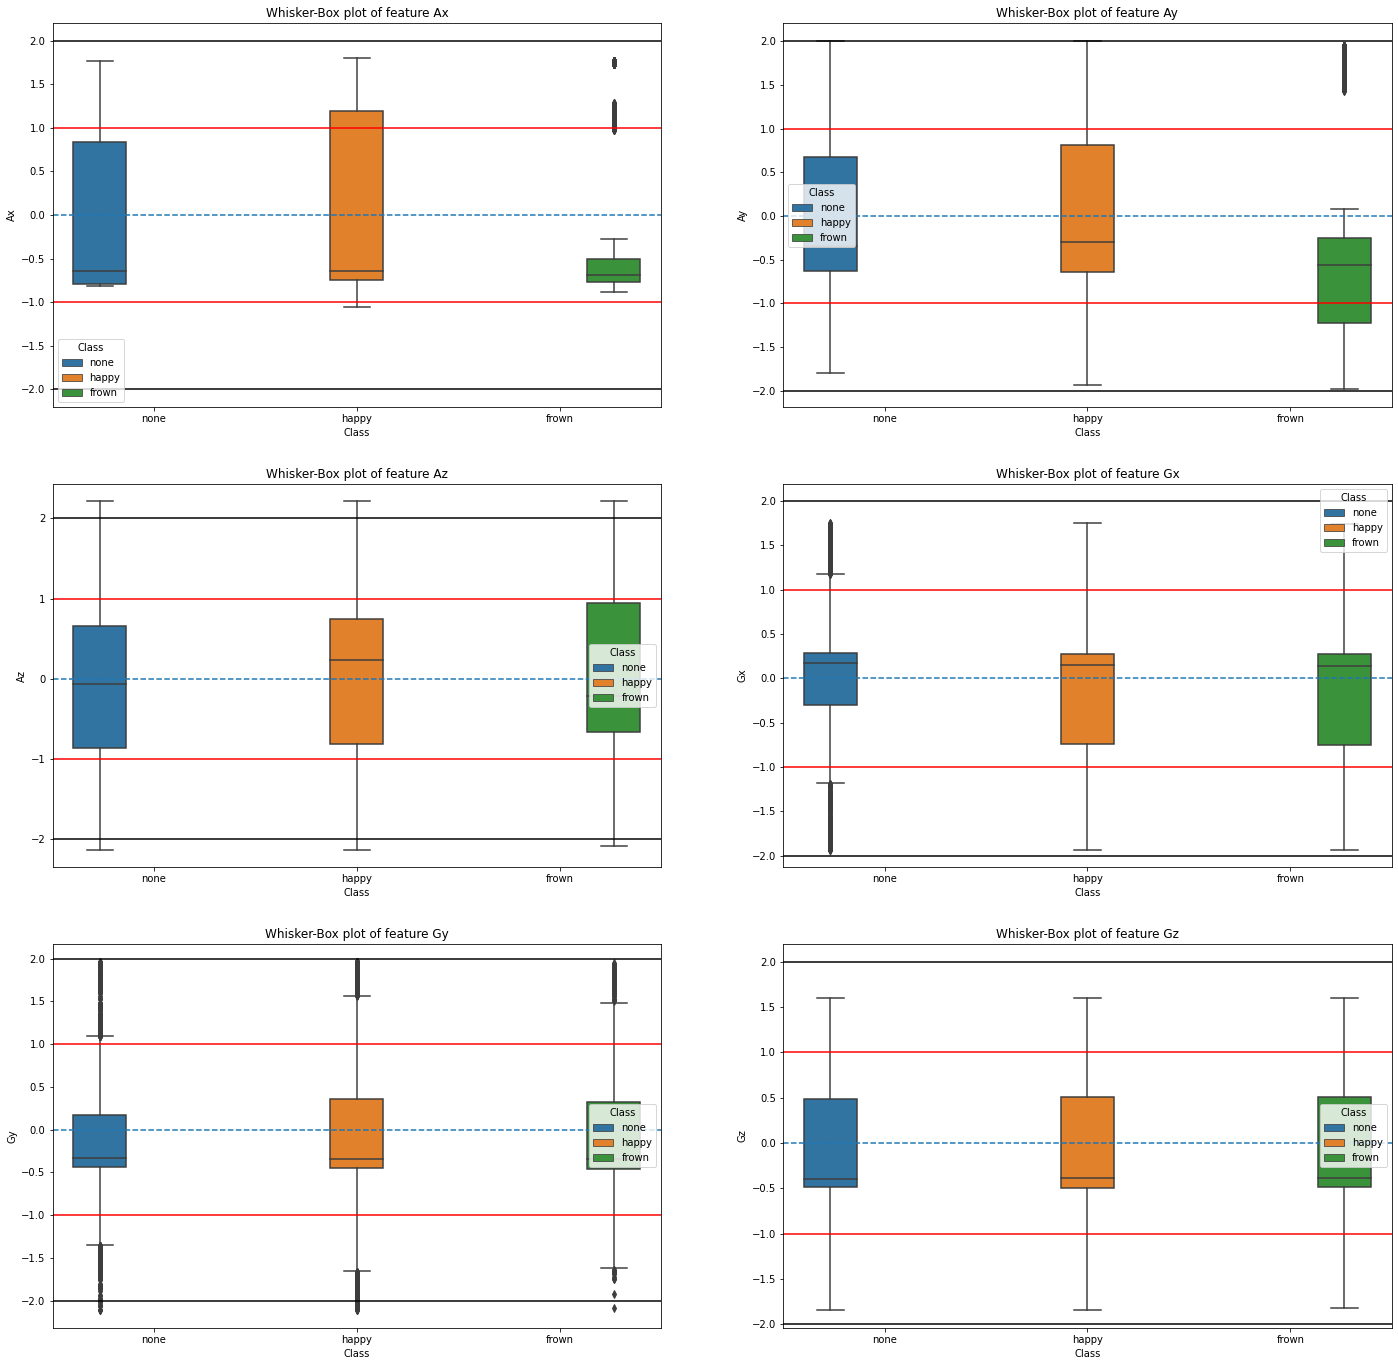

In [31]:
whisker_box_plotter(features, data_new2, data_new2_mean, data_new2_std)

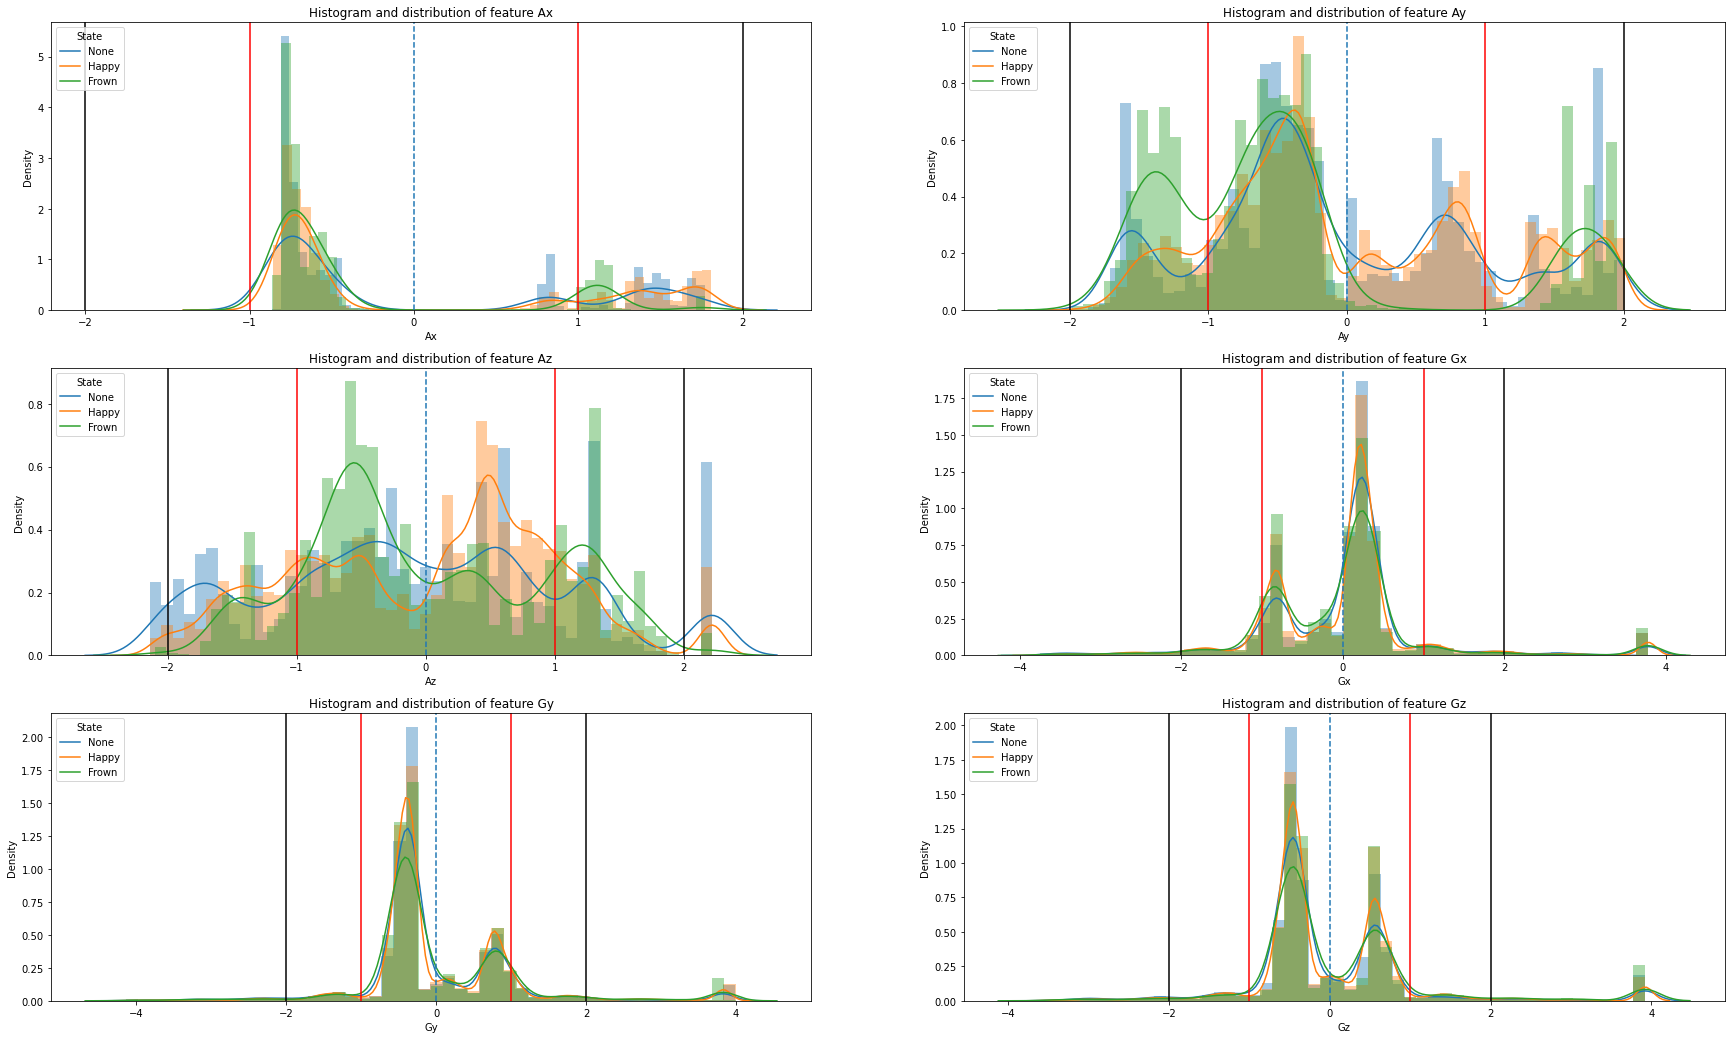

In [32]:
distribution_plotter(features, data_new2_x, data_new2_y, data_new2_mean, data_new2_std)

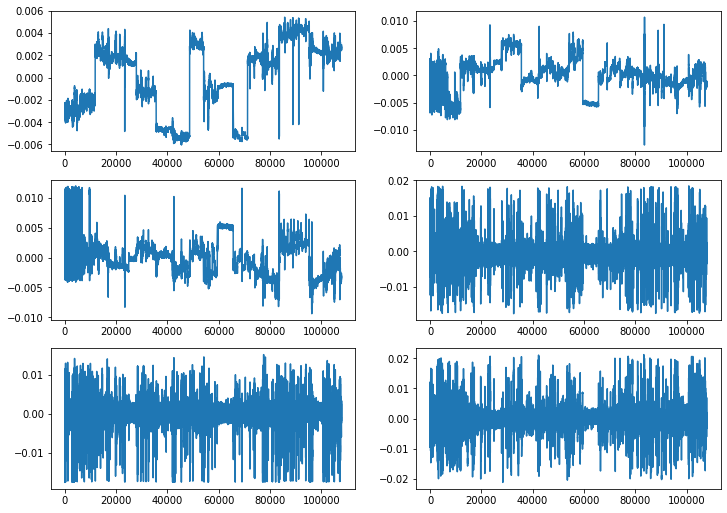

In [33]:
ica_datanew2_x = ica_plots(data_new2_x)
ica_new2 = ica_datanew2_x.assign(Class=data_new2_y)
ica_new2.to_excel('newdata2_ica.xlsx')

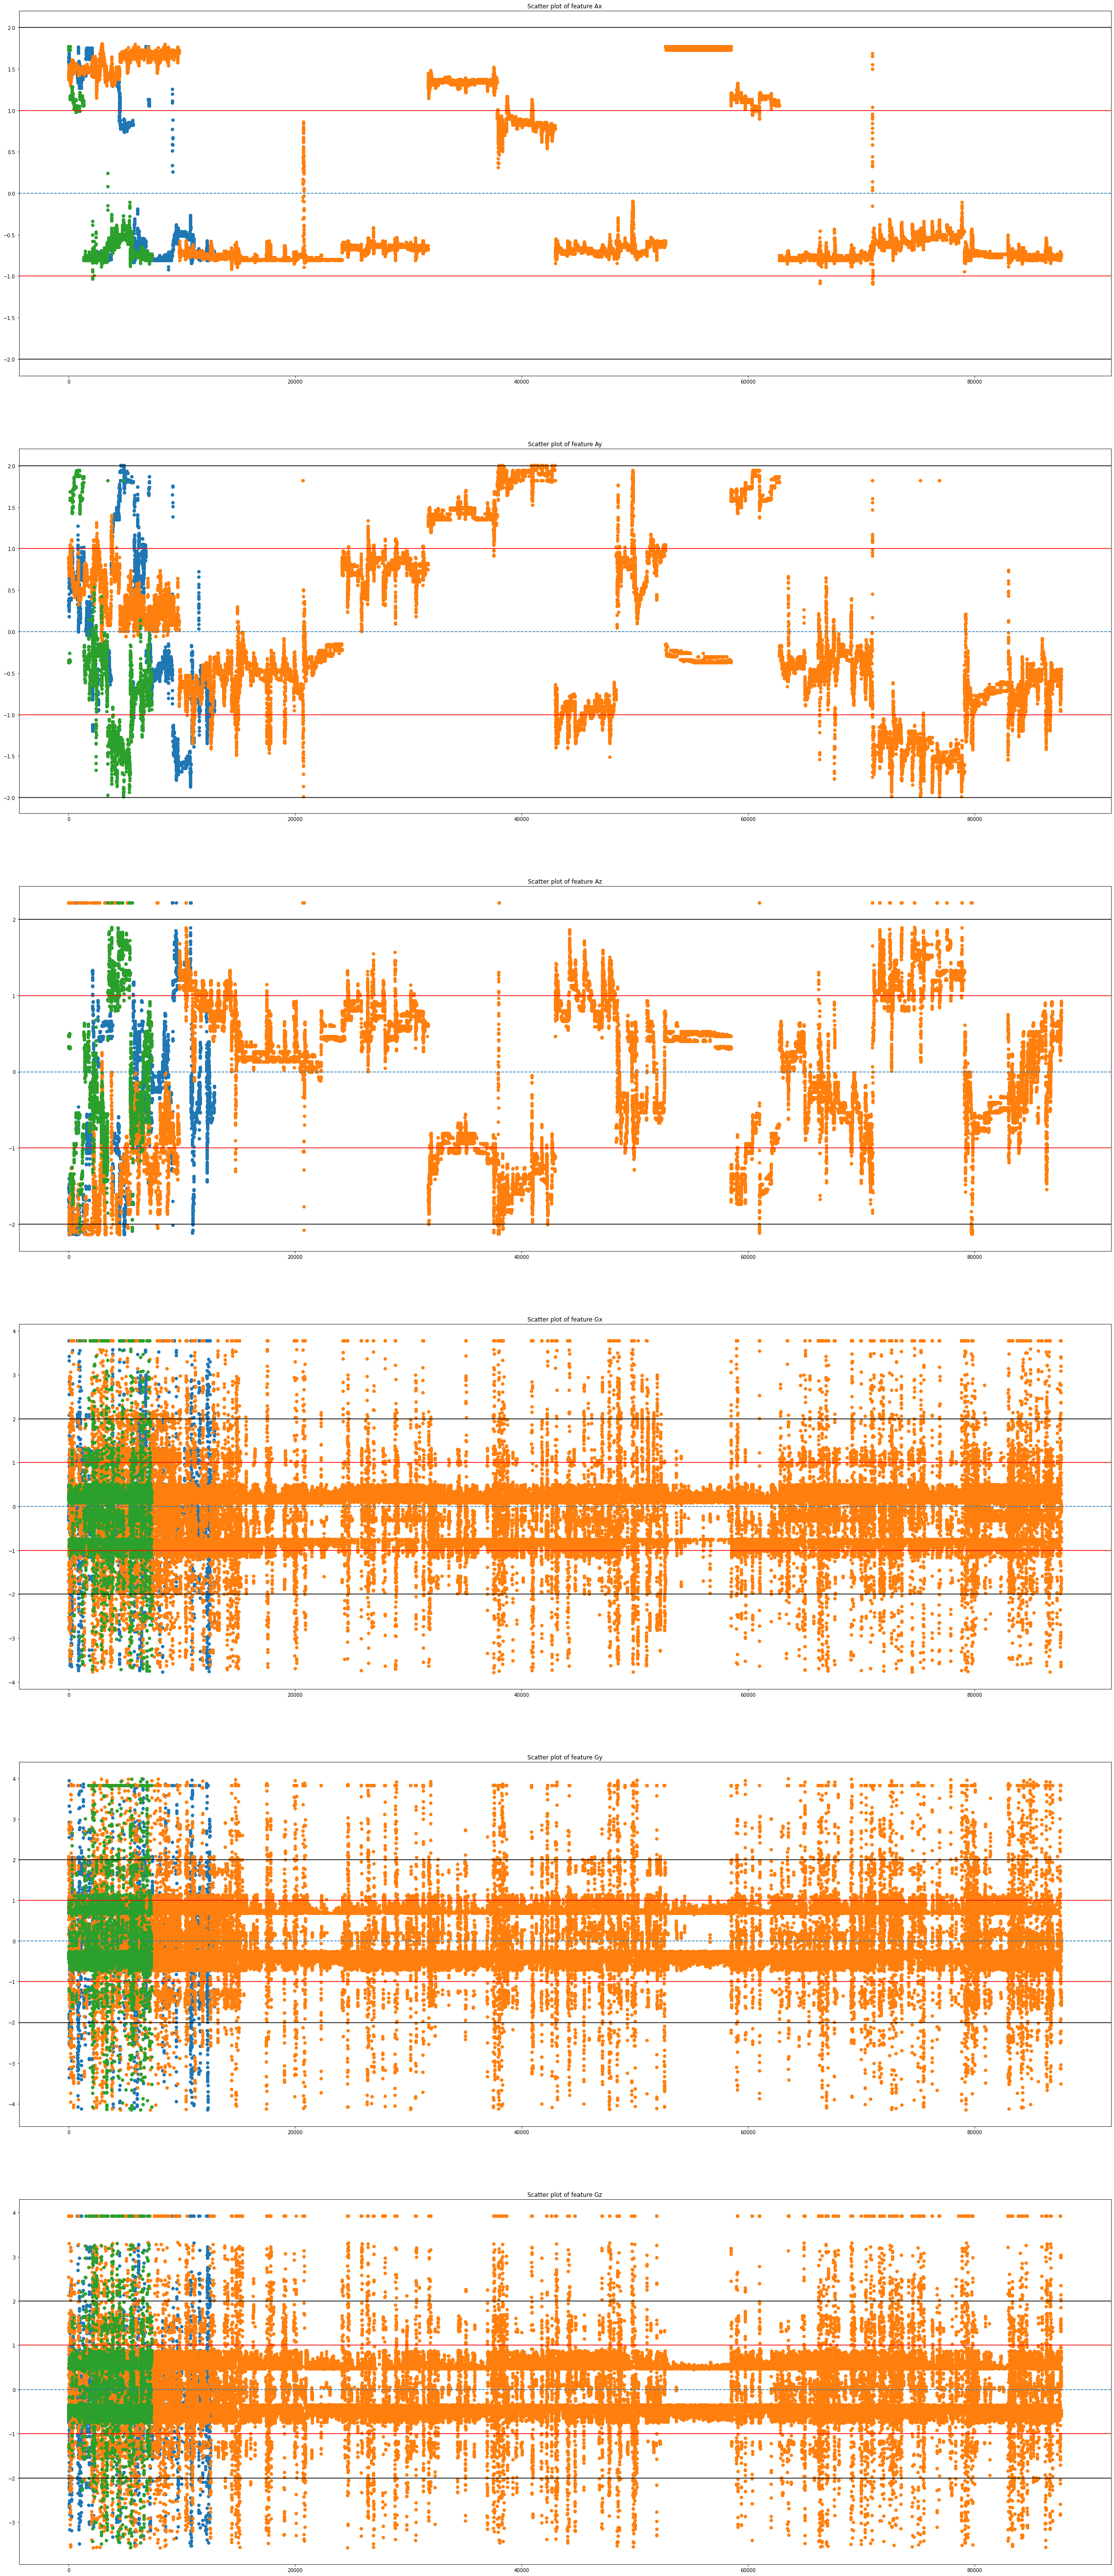

In [34]:
scatter_plotter(features, data_new2_x, data_new2_y, data_new2_mean, data_new2_std)

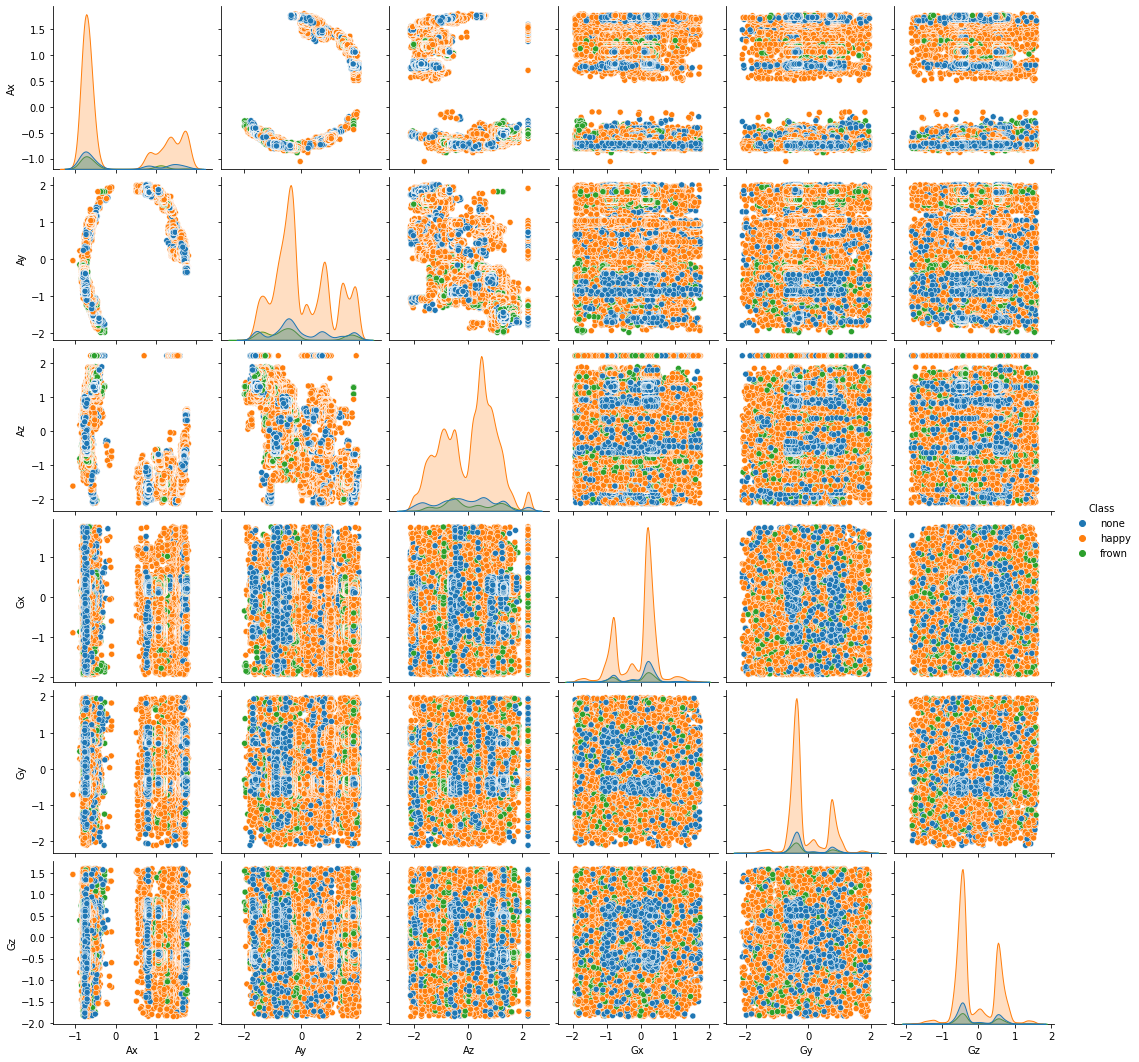

In [35]:
sns.pairplot(data_new2, hue='Class')

<AxesSubplot:>

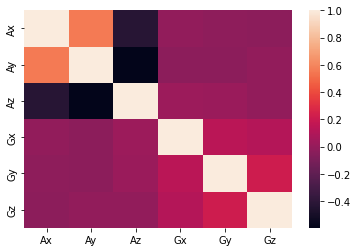

In [36]:
sns.heatmap(data_new2_x.corr())

### ***PCA***

In [37]:
# Perform PCA
pca = PCA(n_components=6)
data_pca = pca.fit_transform(data_new_x)

data_pca = pd.DataFrame(data_pca)


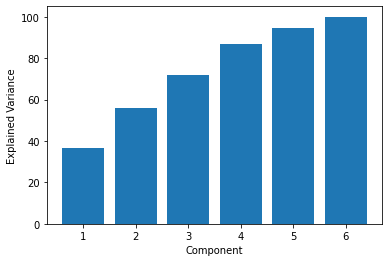

[ 36.73  55.78  71.85  86.75  94.49 100.  ]


In [38]:
# Compute the percentage of variance for each component
variance_ratio = pca.explained_variance_ratio_
cumulative_var = np.cumsum(variance_ratio)
cumulative_percent = 100 * np.round(cumulative_var, 4)

# Plot the explained variance for each component
plt.bar(range(1, 7), cumulative_percent)
plt.xlabel('Component')
plt.ylabel('Explained Variance')
plt.show()

print(cumulative_percent)

<AxesSubplot:>

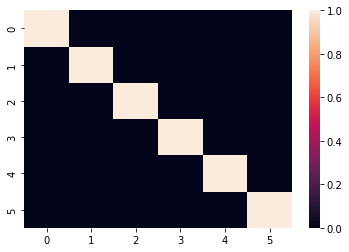

In [39]:
sns.heatmap(data_pca.corr())

In [40]:
data_pca = data_pca.assign(Class = data_new_y)
data_pca.to_excel('data_pca.xlsx')

### ***LDA***

In [41]:
# Perform LDA
lda = LinearDiscriminantAnalysis()
data_lda = lda.fit_transform(data_new_x, data_new_y)
data_lda = pd.DataFrame(data_lda)

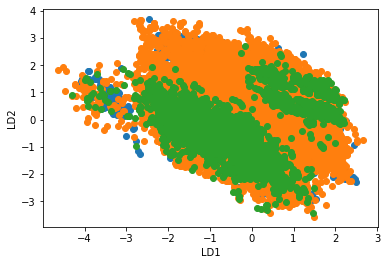

In [42]:
plt.scatter(x=data_lda[0].loc[(data_new_y == 'none').to_numpy()], y=data_lda[1].loc[(data_new_y == 'none').to_numpy()])
plt.scatter(x=data_lda[0].loc[(data_new_y == 'happy').to_numpy()], y=data_lda[1].loc[(data_new_y == 'happy').to_numpy()])
plt.scatter(x=data_lda[0].loc[(data_new_y == 'frown').to_numpy()], y=data_lda[1].loc[(data_new_y == 'frown').to_numpy()])

plt.xlabel('LD1')
plt.ylabel('LD2')
plt.show()

In [44]:
data_lda = data_lda.assign(Class = data_new_y)
data_lda.to_excel('data_lda.xlsx')